In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
cd /content/drive/MyDrive/MLpractice

/content/drive/MyDrive/MLpractice


In [270]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [236]:
# 데이터 로드
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")
#PassengerId 열을 인덱스로 지정/
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')
# train.head()
train.isnull().sum()
# train
# test



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [237]:
# 이름과 호칭 정리

# 호칭을 뽑기 위한 정규식
pat = re.compile('[\w]+, ([\w]+)')
# 이름에서 호칭을 뽑기위한 함수 정의
def find_name_title(x):
    return pat.findall(x)[0]

#이름 내용을 호칭으로 변경해버리기
train['Name'] = train['Name'].apply(find_name_title)
test['Name'] = test['Name'].apply(find_name_title)

In [238]:
train['Cabin_yes'] = np.where(train['Cabin'].isnull()==False,1,0)
test['Cabin_yes'] = np.where(test['Cabin'].isnull()==False,1,0)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes
PassengerId,,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [239]:
#cabin 정리
train['Cabin_yes'] = np.where(train['Cabin'].isnull()==False,1,0)
test['Cabin_yes'] = np.where(test['Cabin'].isnull()==False,1,0)

pat_cabin = re.compile('([\w])[0-9]*')

#cabin의 앞문자를 뽑아내서 정리
def Cabin_word(x):
    if x is not np.nan and x is not None:
        return pat_cabin.findall(x)[0]
    else: return 'X'

train['Cabin_C'] = train['Cabin'].apply(Cabin_word)
test['Cabin_C'] = test['Cabin'].apply(Cabin_word)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes,Cabin_C
PassengerId,,,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,X
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,X
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1,C
5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S,0,X
888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S,1,B
889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,X


In [241]:
#one hot encoding(나이 데이터 채울려고 카테고리형 문자열 데이터를 encoding)

train_dummy = pd.get_dummies(data=train,columns=['Name','Sex','Embarked','Cabin_C']).drop(['Ticket','Cabin'], axis=1)
test_dummy = pd.get_dummies(data=test,columns=['Name','Sex','Embarked','Cabin_C']).drop(['Ticket','Cabin'], axis=1)

test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_yes,Cabin_C
PassengerId,,,,,,,,,,,,
892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q,0,X
893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S,0,X
894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q,0,X
895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S,0,X
896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,X
1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C,1,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,X


In [242]:
#KNN Regressor로 나이 채워놓기

knn = KNeighborsRegressor()
# 나이가 있는 데이터로 fit해서 모델을 생성
knn.fit(train_dummy[train_dummy['Age'].isnull()==False][train_dummy.columns.drop('Age')],
       train_dummy[train_dummy['Age'].isnull()==False]['Age'])
# 나이가 결측인 데이터를 예측
guesses = knn.predict(train_dummy[train_dummy['Age'].isnull()==True][train_dummy.columns.drop('Age')])
guesses

array([47.8  , 27.8  , 18.4  , 32.5  , 17.6  , 25.2  , 21.584, 17.6  ,
       25.9  , 28.4  , 29.6  , 33.2  , 17.6  , 29.2  , 49.4  , 39.2  ,
       11.734, 25.2  , 29.6  , 17.6  , 29.6  , 29.6  , 25.2  , 30.2  ,
       19.8  , 29.6  , 47.8  , 17.6  , 20.4  , 27.1  , 26.2  , 37.   ,
       35.8  , 48.8  , 22.4  , 37.   , 28.4  , 46.8  , 28.8  , 47.8  ,
       17.6  , 35.2  , 47.8  , 25.2  , 12.6  , 26.6  , 17.1  , 19.3  ,
       36.4  , 46.4  , 47.8  , 21.5  , 40.9  , 17.6  , 33.4  , 54.6  ,
       39.2  , 48.   , 17.6  , 31.4  , 27.9  , 29.6  , 31.8  , 35.2  ,
       20.8  , 37.6  , 25.2  , 36.2  , 50.4  , 32.5  , 17.6  , 17.6  ,
       33.2  , 18.4  , 17.6  , 36.4  , 25.2  , 29.9  , 12.6  , 25.2  ,
       27.5  , 33.4  , 25.4  , 28.4  , 36.4  , 47.8  , 36.2  , 28.4  ,
       26.   , 29.6  , 40.6  , 47.8  , 29.6  , 33.4  , 29.9  , 36.4  ,
       42.2  , 33.4  , 12.6  , 26.   , 28.4  , 30.3  , 21.5  , 52.2  ,
       29.6  , 31.4  , 32.5  , 26.8  , 30.8  , 26.8  , 28.2  , 41.   ,
      

In [243]:
#예측값 대입하기

train_dummy.loc[train_dummy['Age'].isnull()==True,'Age'] = guesses
train_dummy.isnull().sum()


Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_yes        0
Name_Capt        0
Name_Col         0
Name_Don         0
Name_Dr          0
Name_Jonkheer    0
Name_Lady        0
Name_Major       0
Name_Master      0
Name_Miss        0
Name_Mlle        0
Name_Mme         0
Name_Mr          0
Name_Mrs         0
Name_Ms          0
Name_Rev         0
Name_Sir         0
Name_the         0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Cabin_C_A        0
Cabin_C_B        0
Cabin_C_C        0
Cabin_C_D        0
Cabin_C_E        0
Cabin_C_F        0
Cabin_C_G        0
Cabin_C_T        0
Cabin_C_X        0
dtype: int64

In [244]:
train_dummy

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_yes,Name_Capt,Name_Col,Name_Don,...,Embarked_S,Cabin_C_A,Cabin_C_B,Cabin_C_C,Cabin_C_D,Cabin_C_E,Cabin_C_F,Cabin_C_G,Cabin_C_T,Cabin_C_X
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,3,35.0,0,0,8.0500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
889,0,3,13.2,1,2,23.4500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


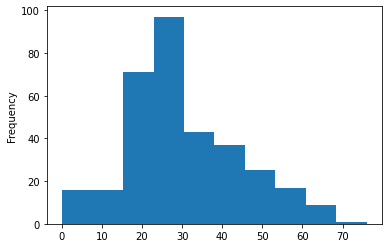

In [245]:
test_dummy['Age'].plot(kind='hist', bins=10)
train_dummy['Age_cat'] = pd.cut(train_dummy['Age'],10, labels=[*range(10)])
test_dummy['Age_cat'] = pd.cut(test_dummy['Age'],10, labels=[*range(10)])

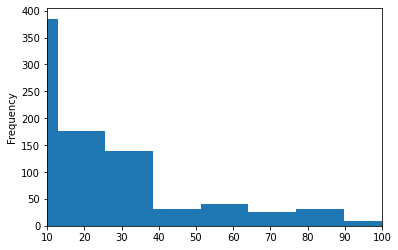

In [246]:
train_dummy['Fare'].plot(kind='hist', bins=40, xlim=(10,100))

In [247]:
# train_dummy['Fare_cat'] = pd.cut(train_dummy.Fare,precision=5,bins=[0,10,30,80,120,999999] ,labels=['lowlow','low','mid','high','highhigh'])
# test_dummy['Fare_cat'] = pd.cut(test_dummy.Fare,precision=5,bins=[0,10,30,80,120,999999] ,labels=['lowlow','low','mid','high','highhigh'])


train_dummy['Fare_cat'] = pd.qcut(train_dummy.Fare,5, labels=[*range(5)])
test_dummy['Fare_cat'] = pd.qcut(test_dummy.Fare,5, labels=[*range(5)])

In [248]:
train_dummy['Fare_cat'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_cat, dtype: int64

In [249]:
# 카테고리 화한 연속형 변수들에 대해서 다시 One hot encoding
train_final = pd.get_dummies(train_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')
test_final = pd.get_dummies(test_dummy, columns=['Age_cat','Fare_cat','Pclass']).drop(['Age','Fare','Pclass'],axis=1, errors='ignore')
train_final

,Survived,SibSp,Parch,Cabin_yes,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,...,Age_cat_8,Age_cat_9,Fare_cat_0,Fare_cat_1,Fare_cat_2,Fare_cat_3,Fare_cat_4,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
888,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
889,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [250]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(train_final.iloc[:,1:],train_final['Survived'],test_size=0.2,random_state=42)

DT = DecisionTreeClassifier(max_depth=100)
model = DT.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.8100558659217877

In [300]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf_clf.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(pred, y_test)
precision_score(pred, y_test)
f1_score(pred, y_test)

print("accuracy_score : ",accuracy_score)
print("precision_score : "+int(precision_score))
print("f1_score : "+str(f1_score))

accuracy_score :  {<function accuracy_score at 0x7f703f54d9e0>}


In [260]:
### Random Forest를 적용하여 n_estimators=100, random_state=42로 예측하고
#10-fold cross validation을 사용하여 forest 점수의 평균값을 구하시오.
from sklearn.model_selection import cross_validate
scores = cross_validate(rf_clf, X_train, y_train, cv=10)
scores

{'fit_time': array([0.18125677, 0.16893291, 0.17144251, 0.18454957, 0.18544722,
        0.18193412, 0.17340446, 0.1743505 , 0.18489742, 0.18163157]),
 'score_time': array([0.01358533, 0.01388669, 0.01354432, 0.01417518, 0.01429892,
        0.0138495 , 0.01552105, 0.0135293 , 0.01348472, 0.01339817]),
 'test_score': array([0.81944444, 0.79166667, 0.8028169 , 0.91549296, 0.83098592,
        0.78873239, 0.78873239, 0.84507042, 0.71830986, 0.90140845])}

In [301]:
# Support vector machine(SVM)을 적용하여 
# gamma="auto"로 예측하고 10-fold cross validation을 사용하여 
# SVM 점수의 평균값을 구하시오. 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

model=SVC(kernel='linear',gamma = "auto", C=20).fit(X_train,y_train)
scores=cross_val_score(model, X_train, y_train, cv=10)
accuracy_score(pred, y_test)
precision_score(pred, y_test)
f1_score(pred, y_test)

print("CV 점수 : " +str(scores))
st_scores=cross_val_score(model, X_train, y_train,cv=StratifiedKFold(5, random_state=10, shuffle=True))
print("StratifiedKFold CV 점수 : " +str(st_scores))
print()
print("CV 평균점수 : " +str(scores.mean()))
print("StratifiedKFold CV 평균점수 : " +str(st_scores.mean()))

print("accuracy_score : ", accuracy_score)
print("precision_score : ", precision_score)
print("f1_score : ", f1_score)

CV 점수 : [0.875      0.75       0.74647887 0.92957746 0.87323944 0.74647887
 0.77464789 0.84507042 0.74647887 0.90140845]
StratifiedKFold CV 점수 : [0.83216783 0.8041958  0.82394366 0.77464789 0.82394366]

CV 평균점수 : 0.8188380281690142
StratifiedKFold CV 평균점수 : 0.8117797695262483
accuracy_score :  <function accuracy_score at 0x7f703f54d9e0>
precision_score :  <function precision_score at 0x7f703f550170>
f1_score :  <function f1_score at 0x7f703f54ddd0>


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Linear SVC

from sklearn.svm import LinearSVC

for thisC in [1,3,5,10,40,60,80,100]:
    model2=LinearSVC(C=thisC).fit(X_train,y_train)
    scoretrain=model2.score(X_train,y_train)
    scoretest=model2.score(X_test,y_test)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f} \n".format(thisC,scoretrain, scoretest)) 

#LinearSVC(속도 빠름), SVC(느림, 커널 트릭 지원)

선형 SVM : C:1, training score:0.845506, test score:0.810056 

선형 SVM : C:3, training score:0.845506, test score:0.810056 

선형 SVM : C:5, training score:0.846910, test score:0.804469 

선형 SVM : C:10, training score:0.846910, test score:0.804469 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


선형 SVM : C:40, training score:0.831461, test score:0.798883 

선형 SVM : C:60, training score:0.839888, test score:0.782123 

선형 SVM : C:80, training score:0.831461, test score:0.810056 

선형 SVM : C:100, training score:0.827247, test score:0.793296 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#RBF 커널 SVM, C와 gamma 퍼러미터 사용
for thisGamma in [.1, .25, .5, 1]:
    for thisC in [1,5,10,20,40,100]:
        model3=SVC(kernel="rbf", C=thisC, 
                   gamma=thisGamma).fit(X_train, y_train)
        m3train=model3.score(X_train,y_train)
        m3test=model3.score(X_test,y_test)
        print("RBF SVM : C:{}, gamma:{},training score:{:2f},test score:{:2f} \n".format(thisC, thisGamma, m3train, m3test))

RBF SVM : C:1, gamma:0.1,training score:0.852528,test score:0.826816 

RBF SVM : C:5, gamma:0.1,training score:0.898876,test score:0.821229 

RBF SVM : C:10, gamma:0.1,training score:0.908708,test score:0.837989 

RBF SVM : C:20, gamma:0.1,training score:0.921348,test score:0.843575 

RBF SVM : C:40, gamma:0.1,training score:0.925562,test score:0.826816 

RBF SVM : C:100, gamma:0.1,training score:0.928371,test score:0.826816 

RBF SVM : C:1, gamma:0.25,training score:0.889045,test score:0.837989 

RBF SVM : C:5, gamma:0.25,training score:0.924157,test score:0.837989 

RBF SVM : C:10, gamma:0.25,training score:0.928371,test score:0.849162 

RBF SVM : C:20, gamma:0.25,training score:0.928371,test score:0.849162 

RBF SVM : C:40, gamma:0.25,training score:0.928371,test score:0.849162 

RBF SVM : C:100, gamma:0.25,training score:0.928371,test score:0.849162 

RBF SVM : C:1, gamma:0.5,training score:0.915730,test score:0.826816 

RBF SVM : C:5, gamma:0.5,training score:0.928371,test score:0

In [ ]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV
param={'C':[1,5,10,20,40,100],
      'gamma':[.1, .25, .5, 1]}
GS=GridSearchCV(SVC(kernel='rbf'),param, cv=5)
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 5, 'gamma': 0.1}
0.8398601398601399
